In [1]:
import numpy as np
from datascience import *
path_data = 'https://github.com/data-8/textbook/raw/gh-pages/data/'
banknotes = Table.read_table(path_data + 'banknote.csv')
color_table = Table().with_columns(
    'Class', make_array(1, 0),
    'Color', make_array('darkblue', 'gold'))
banknotes = banknotes.join('Class', color_table)
banknotes

Class,WaveletVar,WaveletSkew,WaveletCurt,Entropy,Color
0,3.6216,8.6661,-2.8073,-0.44699,gold
0,4.5459,8.1674,-2.4586,-1.4621,gold
0,3.866,-2.6383,1.9242,0.10645,gold
0,3.4566,9.5228,-4.0112,-3.5944,gold
0,0.32924,-4.4552,4.5718,-0.9888,gold
0,4.3684,9.6718,-3.9606,-3.1625,gold
0,3.5912,3.0129,0.72888,0.56421,gold
0,2.0922,-6.81,8.4636,-0.60216,gold
0,3.2032,5.7588,-0.75345,-0.61251,gold
0,1.5356,9.1772,-2.2718,-0.73535,gold


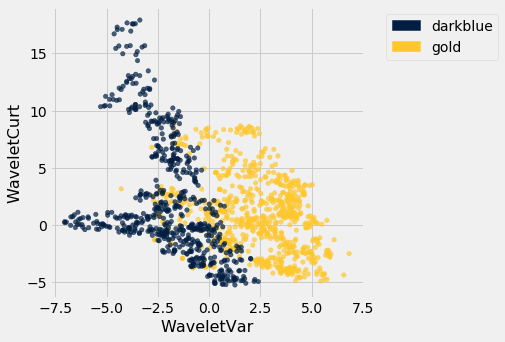

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
banknotes.scatter('WaveletVar', 'WaveletCurt', colors='Color')

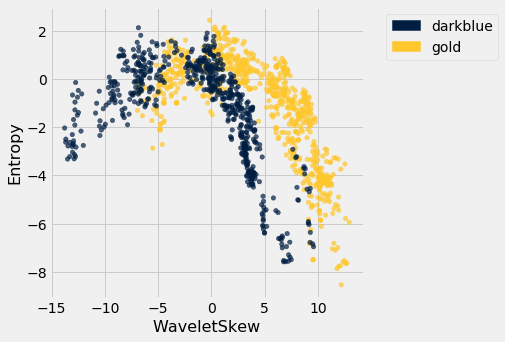

In [3]:
banknotes.scatter('WaveletSkew', 'Entropy', colors='Color')

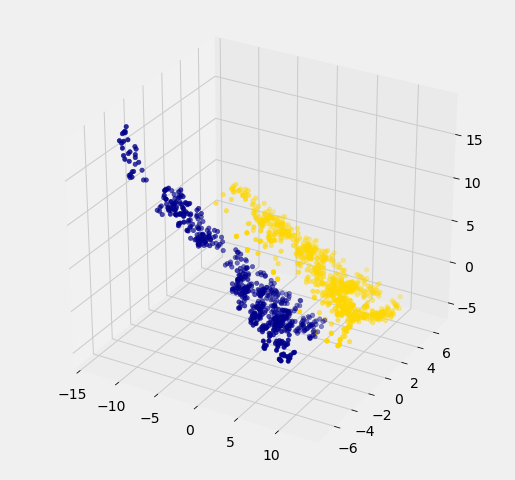

In [4]:
from mpl_toolkits.mplot3d import Axes3D
ax = plt.figure(figsize=(8,8)).add_subplot(111, projection='3d')
ax.scatter(banknotes.column('WaveletSkew'), 
           banknotes.column('WaveletVar'), 
  banknotes.column('WaveletCurt'), c=banknotes.column('Color'));           

In [5]:
wine = Table.read_table(path_data + 'wine.csv')
def is_one(x):
    if x == 1:
        return 1
    else:
        return 0
    
wine = wine.with_column('Class', wine.apply(is_one, 0))
wine

Class,Alcohol,Malic Acid,Ash,Alcalinity of Ash,Magnesium,Total Phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color Intensity,Hue,OD280/OD315 of diulted wines,Proline
1,14.23,1.71,2.43,15.6,127,2.8,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.2,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.4,1050
1,13.16,2.36,2.67,18.6,101,2.8,3.24,0.3,2.81,5.68,1.03,3.17,1185
1,14.37,1.95,2.5,16.8,113,3.85,3.49,0.24,2.18,7.8,0.86,3.45,1480
1,13.24,2.59,2.87,21,118,2.8,2.69,0.39,1.82,4.32,1.04,2.93,735
1,14.2,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
1,14.39,1.87,2.45,14.6,96,2.5,2.52,0.3,1.98,5.25,1.02,3.58,1290
1,14.06,2.15,2.61,17.6,121,2.6,2.51,0.31,1.25,5.05,1.06,3.58,1295
1,14.83,1.64,2.17,14,97,2.8,2.98,0.29,1.98,5.2,1.08,2.85,1045
1,13.86,1.35,2.27,16,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


In [0]:
def distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2)**2))

In [7]:
wine_attributes = wine.drop('Class')
distance(np.array(wine_attributes.row(0)), 
         np.array(wine_attributes.row(1)))

31.265012394048398

In [8]:
distance(np.array(wine_attributes.row(0)),
       np.array(wine_attributes.row(177)))

506.05936766351834

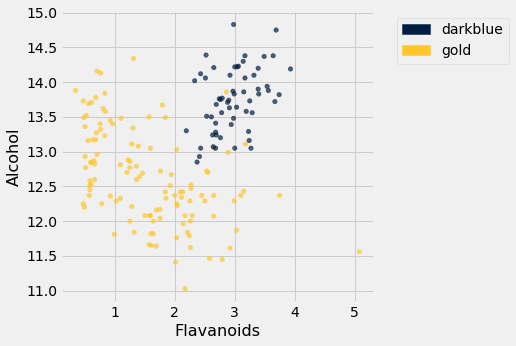

In [9]:
wine_with_colors = wine.join('Class', color_table)
wine_with_colors.scatter('Flavanoids', 'Alcohol', colors='Color')

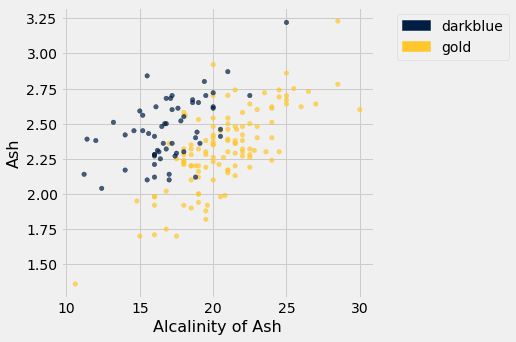

In [10]:
wine_with_colors.scatter('Alcalinity of Ash', 'Ash', colors='Color')

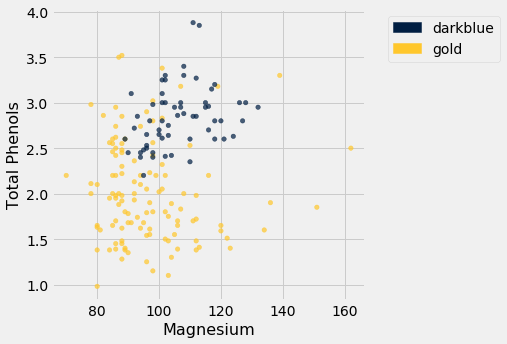

In [11]:
wine_with_colors.scatter('Magnesium', 'Total Phenols', colors='Color')

In [0]:
def all_distances(training, new_point):
    attributes = training.drop('Class')
    def distance_from_point(row):
        return distance(np.array(new_point), np.array(row))
    return attributes.apply(distance_from_point)

def table_with_distances(training, new_point):
    return training.with_column('Distance',
                  all_distances(training, new_point))

def closest(training, new_point, k):
    with_dists = table_with_distances(training, new_point)
    sorted_by_distance = with_dists.sort('Distance')
    topk = sorted_by_distance.take(np.arange(k))
    return topk

In [13]:
special_wine = wine.drop('Class').row(0)
closest(wine, special_wine, 5)

Class,Alcohol,Malic Acid,Ash,Alcalinity of Ash,Magnesium,Total Phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color Intensity,Hue,OD280/OD315 of diulted wines,Proline,Distance
1,14.23,1.71,2.43,15.6,127,2.8,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.74,1.67,2.25,16.4,118,2.6,2.9,0.21,1.62,5.85,0.92,3.2,1060,10.3928
1,14.21,4.04,2.44,18.9,111,2.85,2.65,0.3,1.25,5.24,0.87,3.33,1080,22.3407
1,14.1,2.02,2.4,18.8,103,2.75,2.92,0.32,2.38,6.2,1.07,2.75,1060,24.7602
1,14.38,3.59,2.28,16,102,3.25,3.17,0.27,2.19,4.9,1.04,3.44,1065,25.0947


In [0]:
def majority(topkclasses):
    ones = topkclasses.where('Class', are.equal_to(1)).num_rows
    zeros = topkclasses.where('Class', are.equal_to(0)).num_rows
    if ones > zeros:
        return 1
    else:
        return 0

def classify(training, new_point, k):
    closestk = closest(training, new_point, k)
    topkclasses = closestk.select('Class')
    return majority(topkclasses)

In [15]:
classify(wine, special_wine, 5)

1

In [16]:
special_wine = wine.drop('Class').row(177)
classify(wine, special_wine, 5)

0

In [0]:
shuffled_wine = wine.sample(with_replacement=False) 
training_set = shuffled_wine.take(np.arange(89))
test_set  = shuffled_wine.take(np.arange(89, 178))

In [0]:
def count_zero(array):
    """Counts the number of 0's in an array"""
    return len(array) - np.count_nonzero(array)

def count_equal(array1, array2):
    """Takes two numerical arrays of equal length
    and counts the indices where the two are equal"""
    return count_zero(array1 - array2)

def evaluate_accuracy(training, test, k):
    test_attributes = test.drop('Class')
    def classify_testrow(row):
        return classify(training, row, k)
    c = test_attributes.apply(classify_testrow)
    return count_equal(c, test.column('Class')) / test.num_rows

In [19]:
evaluate_accuracy(training_set, test_set, 5)

0.9101123595505618